In [1]:
from gensim.models import word2vec
from tensorflow.keras import preprocessing
import matplotlib.pyplot as plt
from pyvi import ViTokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.dtprocess import cleandt
from plugins.embedding import PatchEmbedding, MeanVectorizer

In [58]:
# from google.colab import drive
# drive.mount('/content/drive')

In [59]:
# %cd /content/drive/My Drive/Colab Notebooks/Text_Generator

In [60]:
# %ls -la

## Import and normalize data

In [2]:
news = pd.read_csv('./data/vnexpress/csv/vnexpress.csv').drop(columns='Unnamed: 0', axis=1)
print(news.shape)

(2481, 6)


In [3]:
news['tag'] = news['content'] + news['title'] + news['description']
news.drop(columns=['description','content'], inplace=True)

In [4]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2481 entries, 0 to 2480
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article_id  2481 non-null   int64 
 1   topic       2481 non-null   object
 2   sub-topic   2481 non-null   object
 3   title       2479 non-null   object
 4   tag         2418 non-null   object
dtypes: int64(1), object(4)
memory usage: 97.0+ KB


In [5]:
news.isna().sum()

article_id     0
topic          0
sub-topic      0
title          2
tag           63
dtype: int64

In [6]:
news.dropna(axis=0, inplace=True)
news.reset_index(inplace=True)

In [7]:
news['tag'] = news['tag'].apply(lambda x: x.lower())
news['tag'] = news['tag'].apply(lambda x: cleandt.remove_punctuation(x))
news['tag'] = news['tag'].apply(ViTokenizer.tokenize)
news['tag'] = news['tag'].apply(lambda x: cleandt.remove_stopword(x, './data/vietnamese-stopwords-dash.txt'))

In [8]:
print(news['topic'].value_counts())
news

topic
giai-tri    614
the-thao    498
khoa-hoc    410
doi-song    361
giao-duc    355
du-lich     180
Name: count, dtype: int64


,index,article_id,topic,sub-topic,title,tag
0,0,0,doi-song,to-am,Có nên bắt trẻ xin lỗi?,xin_lỗi đi thế_hệ câu trẻ anh_chị_em bạn_bè xô...
1,1,1,doi-song,to-am,Tác dụng bất ngờ của việc gọi cho mẹ,nghiên_cứu đại_học wisconsinmadison mỹ xem_xét...
2,2,2,doi-song,to-am,"Thiệt thòi của trẻ 'nửa tuần ở với bố, nửa tuầ...",yếu_tố độ trẻ quan_hệ cha_mẹ hai mức_độ xung_đ...
3,3,3,doi-song,to-am,Bi kịch ở tuổi 50 của người phụ nữ Hậu Giang,đôi_mươi trần thị liên_kết_hôn lâm_sơn hải ấp ...
4,4,4,doi-song,to-am,Sốc văn hóa nhà chồng,hoàng thị hòa 34 hà nam chồng học 3 km bố_mẹ h...
...,...,...,...,...,...,...
2413,2476,2476,the-thao,tuong-thuat,Việt Nam thua trận đậm nhất World Cup nữ 2023,ghi_bàn martens 8 snoeijs 11 brugts 18 57 roor...
2414,2477,2477,the-thao,tuong-thuat,Việt Nam hết hy vọng qua vòng bảng World Cup nữ,ghi_bàn encarnacao 7 nazareth 21 trận bồ đào n...
2415,2478,2478,the-thao,tuong-thuat,Việt Nam thua Mỹ ở trận ra quân World Cup nữ,ghi_bàn smith 14 45 horan 77 đối_thủ thế_giới ...
2416,2479,2479,the-thao,tuong-thuat,World Cup nữ 2023 khai mạc,cầu_thủ hai đội khởi_động xong ban tổ_chức tắt...


## Create word embedding model from Word2Vec

In [9]:
sequences = news['tag'].to_list()
input_gensim = []

for sen in sequences:
  input_gensim.append(sen.split())

In [10]:
# model = word2vec.Word2Vec(input_gensim, vector_size=128, window=5, min_count=0, workers=4, sg=1)
# model.save("./model/word.model")

In [11]:
model = word2vec.Word2Vec.load("./model/word.model")

## Find similar texts by Cosine measure

In [12]:
question = '''
Với CLB Hà Lan, tiền đạo cánh người Brazil đạt tỷ lệ ghi bàn và kiến tạo kỳ vọng là 0,58, chỉ xếp thứ 14 nếu đặt ở Ngoại hạng Anh. Ngoài ra, Antony cũng được "thổi phồng" nhờ chơi cho CLB vượt trội về tài chính và lực lượng so với phần còn lại của giải vô địch Hà Lan.
'''

In [13]:
pemb = PatchEmbedding(word_model=model, stopword_path="./data/vietnamese-stopwords-dash.txt")

question_embeddings = pemb.sentence_embedding(question)
post_embeddings = pemb.post_embedding(input_gensim, length=len(input_gensim))

After tonkenized: Với CLB Hà_Lan tiền_đạo cánh Brazil tỷ_lệ ghi_bàn kiến_tạo kỳ_vọng 058 xếp 14 Ngoại_hạng Anh Ngoài_ra Antony thổi_phồng CLB vượt_trội tài_chính lực_lượng giải vô_địch Hà_Lan


In [14]:
print(len(question_embeddings))
question_embeddings[0]

14


array([ 0.32221526, -0.24294023, -0.09745548, -0.13783075,  0.16068271,
       -0.26846766,  0.22800851, -0.17231998, -0.39585692,  0.5041406 ,
        0.10499745, -0.39853716, -0.18343581,  0.2128257 ,  0.06390679,
       -0.35071194, -0.37859702,  0.16856118, -0.00327418, -0.06105788,
        0.36354968, -0.09833966,  0.35767967,  0.21113725, -0.13154764,
        0.4206381 , -0.28591806,  0.62560904,  0.18088755, -0.49436083,
       -0.6171209 ,  0.5616397 , -0.0097766 ,  0.4810187 , -0.1232376 ,
       -0.32196605,  0.04865083,  0.19672126, -0.1387715 , -0.2462126 ,
       -0.17813626, -0.24537896, -0.80057734, -0.5518355 ,  0.05903726,
        0.4556891 , -0.68798923, -0.18094128,  0.43903902,  0.6841393 ,
       -0.00866732,  0.12573124, -0.05307845,  0.46335205, -0.57491124,
        0.6287083 , -0.591304  ,  0.07454038, -0.01049291, -0.13610941,
        0.05734543,  0.69847023, -0.00458654, -0.40452   ,  0.1366213 ,
       -0.10416292, -0.5912275 , -0.14606051,  0.27981868, -0.46

In [15]:
mvectorize = MeanVectorizer(word_model=model)

mean_sentence_embedding = mvectorize.mean_vector_embedding(question_embeddings)
mean_post_embedding = mvectorize.mean_posts_embedding(post_embeddings)

In [16]:
print('The len of the mean embedding vector:', len(mean_sentence_embedding))
print('The length of the mean embedding posts:', len(mean_post_embedding))

# Calculate similarity (cosine similarity)
similarity_score = mvectorize.text_cosine_similarity(mean_sentence_embedding, mean_post_embedding)

# Print the similarity score
print(f"Similarity Score: {similarity_score}")

The len of the mean embedding vector: 128
The length of the mean embedding posts: 2418
Similarity Score: [[0.69646144 0.68978405 0.70317864 ... 0.9175289  0.8755066  0.90611345]]


In [17]:
similar_news = mvectorize.find_similarity(similarity_score, news)

np_similarity_scores [[0.69646144 0.68978405 0.70317864 ... 0.9175289  0.8755066  0.90611345]]
Sorted Indices: [2285 1975 1976 ... 1335 1361 1870]
Top 5 Indices: [2285 1975 1976 1933 2304]


In [18]:
similar_news

,index,article_id,topic,sub-topic,title,tag
2285,2344,2344,the-thao,photo,10 ngôi sao đẳng cấp thế giới ở Asian Cup 2023,almoez ali qatar nhân_tố giúp qatar vô_địch as...
1975,2026,2026,the-thao,bundesliga,15 HLV gây ấn tượng nhất nửa đầu mùa 2023-2024,15 pep guardiola man city cú mùa 20222023 guar...
1976,2027,2027,the-thao,bundesliga,15 hợp đồng thành công nhất nửa đầu mùa 2023-2024,15 sergino dest psv mượn barca hậu_vệ trái des...
1933,1984,1984,the-thao,bundesliga,Kane chạm tay vào Giày vàng châu Âu đầu tiên,tuần kane lập hattrick trận bayern thắng mainz...
2304,2365,2365,the-thao,photo,Những nhân tố đang vụt sáng ở châu Âu,serhou guirassy áo trắng hiện_tượng dẫn_đầu da...


## Visualize the relationships

* The relationships among words

In [19]:
from sklearn.decomposition import PCA

In [20]:
def words_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [word for word in model.wv.vocab]
        
    word_vectors = np.array([model.wv[w] for w in words])
    
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y-0.10, word)

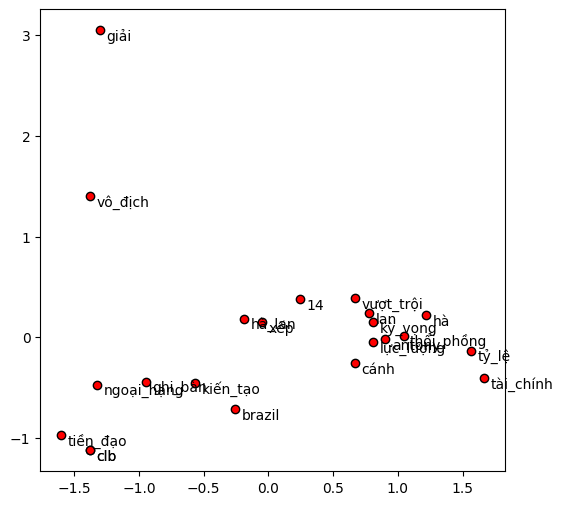

In [21]:
sentence = '''Với CLB Hà Lan tiền đạo cánh người Brazil đạt tỷ lệ ghi bàn và kiến tạo kỳ vọng là chỉ xếp thứ 14 nếu đặt ở Ngoại hạng Anh. 
Ngoài ra, Antony cũng được "thổi phồng" nhờ chơi cho CLB vượt trội về tài chính và lực lượng so với phần còn lại của giải vô địch Hà Lan'''

sentence = sentence.lower()
sentence = cleandt.remove_punctuation(sentence)
sentence = ViTokenizer.tokenize(sentence)
sentence = cleandt.remove_stopword(sentence, './data/vietnamese-stopwords-dash.txt')
words = sentence.split()

words_scatterplot(model, words)

* The relationships among documents

In [22]:
temp_embeddings = pemb.post_embedding(input_gensim, 100)
mean_temp_embedding = mvectorize.mean_posts_embedding(temp_embeddings)

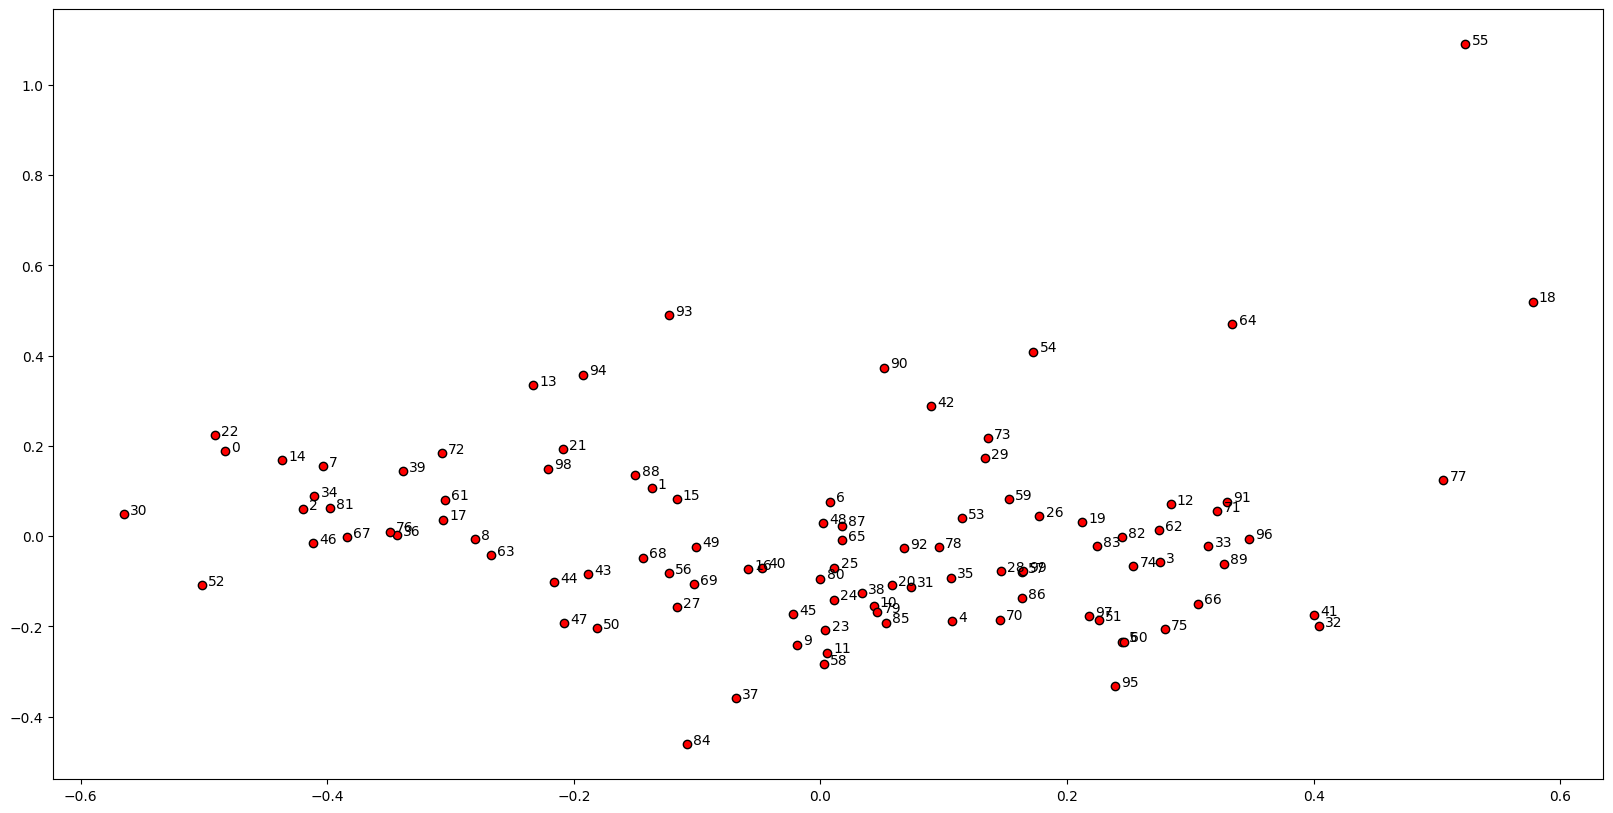

In [23]:
# mean_post_embedding
post_vectors = []
for post_embedding in mean_temp_embedding:
    post_vectors.append(post_embedding.tolist())

twodim = PCA().fit_transform(post_vectors)[:,:2]
index = [i for i,_ in enumerate(mean_temp_embedding)]

plt.figure(figsize=(20,10))
plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
for doc, (x,y) in zip(index, twodim):
    plt.text(x+0.005, y, doc)

## Text clustering with Kmean algorithm

In [24]:
text_embeddings = pemb.post_embedding(input_gensim)
    
print(len(text_embeddings))
print(len(text_embeddings[0]))

2418
304


In [25]:
mean_text_embeddings = mvectorize.flatten_mean_embedding(text_embeddings)
print(len(mean_text_embeddings))

100%|██████████| 2418/2418 [00:00<00:00, 2724.51it/s]

2418


In [26]:
# Đệm thêm 0 để đủ độ dài trong từng văn bản
max_length = max([len(i) for i in mean_text_embeddings])
mean_text_embeddings_padding = np.array(preprocessing.sequence.pad_sequences(mean_text_embeddings, maxlen=max_length, padding='pre', dtype='float32'))

In [27]:
from clusteval import clusteval
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [28]:
print("The shape of padding sequences array:", mean_text_embeddings_padding.shape)
print(mean_text_embeddings_padding[0:5])

The shape of padding sequences array: (2418, 1995)
[[ 0.          0.          0.         ... -0.01428613 -0.04728192
  -0.01155391]
 [ 0.          0.          0.         ... -0.0067737  -0.02587833
  -0.0193274 ]
 [ 0.          0.          0.         ... -0.02516341  0.00589586
  -0.02492141]
 [ 0.          0.          0.         ... -0.00740659 -0.02844947
  -0.02197713]
 [ 0.          0.          0.         ... -0.01391438 -0.00196861
  -0.03569172]]


In [88]:
# Set parameters, as an example dbscan
ce = clusteval(evaluate='silhouette', max_clust=20, normalize=True)

# Fit to find optimal number of clusters using dbscan
results = ce.fit(mean_text_embeddings_padding)

[clusteval] >INFO> Normalizing input data per feature (zero mean and unit variance)


[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 18/18 [00:11<00:00,  1.56it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [2].
[clusteval] >INFO> Fin.


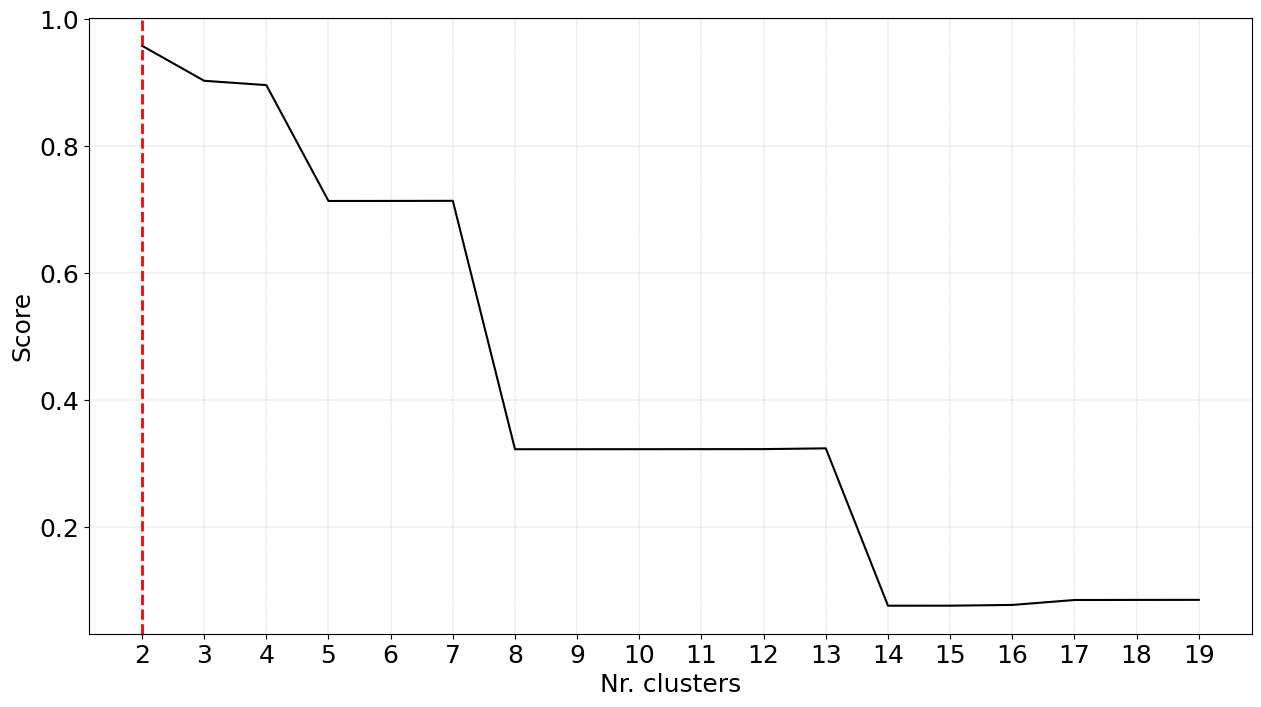

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [89]:
ce.plot(verbose=0)

Text(0, 0.5, 'Sum of squared distance')

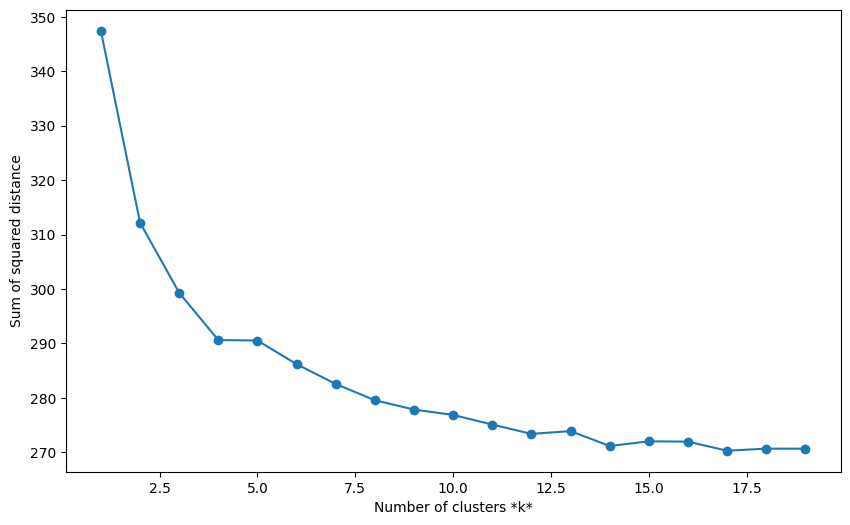

In [90]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(mean_text_embeddings_padding)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(10, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [134]:
kmeans = KMeans(n_clusters=4, verbose=1).fit(mean_text_embeddings_padding)
text_clustering = kmeans.predict(mean_text_embeddings_padding)

Initialization complete
Iteration 0, inertia 495.6134948730469.
Iteration 1, inertia 297.4239501953125.
Iteration 2, inertia 292.71185302734375.
Iteration 3, inertia 291.35870361328125.
Iteration 4, inertia 290.8957824707031.
Iteration 5, inertia 290.6942443847656.
Iteration 6, inertia 290.6419677734375.
Iteration 7, inertia 290.6309509277344.
Iteration 8, inertia 290.63018798828125.
Converged at iteration 8: strict convergence.


In [135]:
embedding_2d = PCA().fit_transform(mean_text_embeddings_padding)[:,:2]
temp = np.append(embedding_2d, text_clustering.reshape((len(text_clustering), 1)), axis=1)
df = pd.DataFrame(temp)

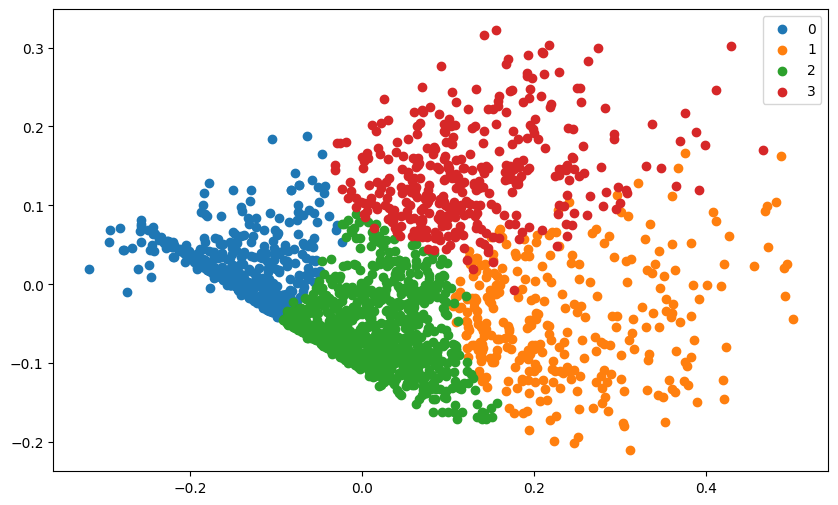

In [136]:
#Getting unique labels
u_labels = np.unique(text_clustering)

#plotting the results
plt.figure(figsize=(10, 6))
for i in u_labels:
    plt.scatter(df[df[2]==i][0] , df[df[2]==i][1], label = i)
plt.legend()
plt.show()

In [137]:
clustered_news = news.copy()
clustered_news.loc[:, len(clustered_news.columns)] = list(text_clustering)

<function matplotlib.pyplot.show(close=None, block=None)>

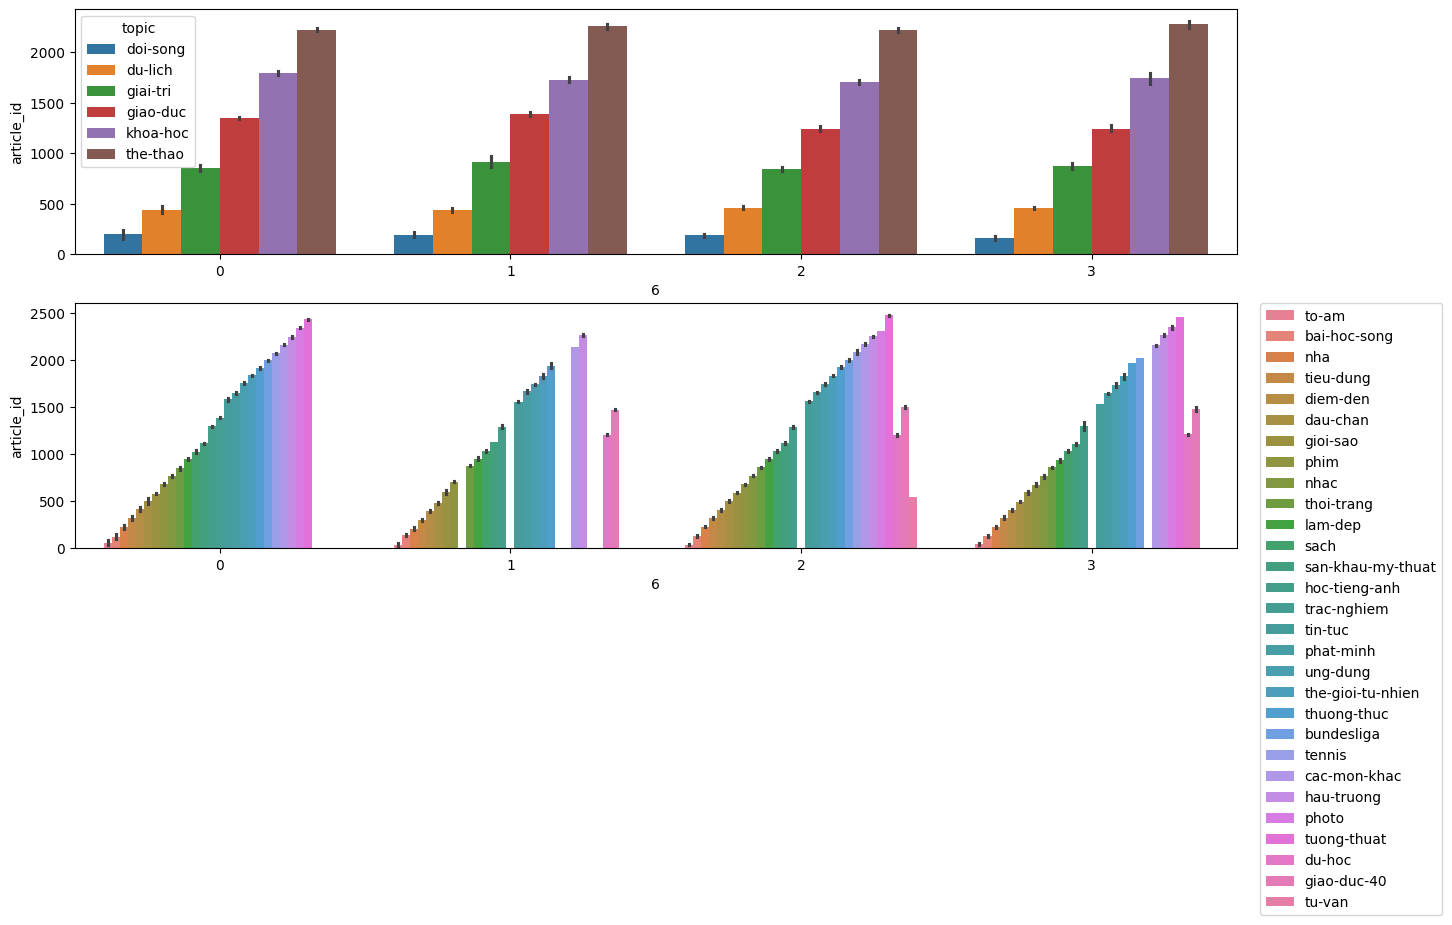

In [139]:
fig, ax = plt.subplots(2, 1, figsize=(15, 7))
sns.barplot(data=clustered_news, y="article_id", x=6, hue="topic", ax=ax[0])
sns.barplot(data=clustered_news, y="article_id", x=6, hue="sub-topic", ax=ax[1])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show